# Analyzing Data to Investigate Risk Factors in Heart Failure Patients to Predict Mortality 

## Introduction

A prevalent complex clinical combination of symptoms and signs known as heart failure is brought on by a decrease in the heart's function as a pump supporting the circulatory system (National Guideline Centre, 2018). The death risk in the first year after treatment is about 35% while the risk of death is less than 10% in the second year for those that are still alive (National Clinical Guideline Centre, 2010). Data analysis on heart failure is significant because it can provide valuable insights into the causes and  risk factors of heart failure. We will look into different patients’ health reports and their experience of heart failure to help us determine the factors that are most influential in predicting possible death of patients with heart failure. 


<img src="hiiii.jpeg" width="250"> <img src="hellooooo.jpeg" width="250">

This leads to the question: **Is it possible to predict whether a patient who has already experienced heart failure will die based on the most influential components of a patient's health?**


To answer this question, we will examine a dataset made up of 13 attributes among 299 patients. This data was retrieved from the `heart_failure_clinical_records_dataset.csv` file in the Heart Disease dataset directory, which may be accessed at: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records (Chicco et al., 2020).

|Variable|Unit|Values|
|--------|----|---------------|
|age: age of the patient|years|positive integers|
|anaemia: decrease of red blood cells or hemoglobin|NA|0 = false; 1 = true|
|high_blood_pressure: if the patient has hypertension|NA|0 = false; 1 = true|
|creatinine_phosphokinase: level of the CPK enzyme in the blood|mcg/L|positive integers|
|diabetes: if the patient has diabetes|NA|0 = false; 1 = true|
|ejection_fraction: percentage of blood leaving the heart at each contraction|%|positive integers|
|platelets: platelets in the blood|kiloplatelets/mL|positive integers|
|sex: woman or man|NA|0 = female; 1 = male|
|serum_creatinine: level of serum creatinine in the blood|mg/dL|positive numbers|
|serum_sodium: level of serum sodium in the blood|mEq/L|positive integers|
|smoking: if the patient smokes or not|NA|0 = false; 1 = true|
|time: follow-up period (285 days)|days|positive integers|
|DEATH_EVENT: if the patient deceased during the follow-up period|NA|0 = false; 1 = true|



**Table 0.1: List of Variable Names**

From Table 0.1, we can see that our dataset includes many variables. However, for our model to be accurate, we need to include only those which have a significant effect on mortality. Since we cannot use categorical variables for our prediciton model, we will have to remove them. This includes `anaemia`, `high_blood_pressure`, `diabetes`, `sex` and `smoking`.

## Methods

Our objective is to predict the death_event class using the optimal predictor variables, which we will select, to build a K-NN Classification model. The measures we will take to do this are as follows:
1. Read-in and tidy the dataset: After loading in the dataset, it must be tidied.
2. Train/Test split: The dataset is split into training and testing sets 
3. Analyze and summarize our training set: Using scatterplot and bar graph, the cross-validation of the training data is visualized to see the variance in the range and median of the different attributes.
4. Analyze predictor variables and select the ones of significance: The significance of predictor variables is analyzed by creating multiple recipes to identify the combination of variables that yield the highest accuracy. The resulting accuracies of each model using cross-validation are then analyzed to determine the best accuracy.
5. Tune for the optimal `K` value and build our final model. Plot a confusion matrix for predictions on the testing set.
6. Discussion of accuracy, implications and further questions.

## Expected Outcomes

With our algorithm that accurately forecasts fatality in patients with heart failure, our expected outcome would be to correctly predict whether a patient having heart failure will die based on the most influential components affecting it.
	
There is a huge impact of our findings as our results can have real-world implications since we could use this model to predict the likelihood that a person having heart failure will die and administer the appropriate level of treatment and monitoring based on other health variables that may be of concern.

Future questions that may be resulted from this is if there are any other variables that are in or outside this datatable that will make the classification more accurate in determining the likelihood of death from a patient who’s been through heart failure.


## 1. Read-in and Tidy Dataset

First, load the libraries:

In [3]:
library(repr)
library(tidyverse)
library(tidymodels)
library(cowplot)
library(kknn)

**Reading in the dataset from the web** and selecting 8 rows to observe.

In [4]:
heart_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv")
slice_sample(heart_data, n = 8)
print("Table 1.1: First 8 Rows of Heart Data")

Rows: 299 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): age, anaemia, creatinine_phosphokinase, diabetes, ejection_fractio...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
70,0,618,0,35,0,327000,1.1,142,0,0,245,0
62,0,281,1,35,0,221000,1.0,136,0,0,108,0
45,0,308,1,60,1,377000,1.0,136,1,0,186,0
60,0,582,1,38,1,451000,0.6,138,1,1,40,1
58,1,145,0,25,0,219000,1.2,137,1,1,170,1
58,1,133,0,60,1,219000,1.0,141,1,0,83,0
65,1,52,0,25,1,276000,1.3,137,0,0,16,0
73,1,1185,0,40,1,220000,0.9,141,0,0,213,0


[1] "Table 1.1: First 8 Rows of Heart Data"


Looking at the `DEATH_EVENT` column, if the variable is 0, it means that the patient is alive. If the variable is 1, it means that the the patient died.

Since we cannot use categorical variables, we will remove them from our data frame.

In [5]:
heart_data <- select(heart_data, -anaemia, -diabetes, -high_blood_pressure, -sex, -smoking)
slice_sample(heart_data, n = 8)
print("Table 1.2: Tidied Heart Data")

age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
42,64,30,215000,3.8,128,250,0
53,270,35,227000,3.4,145,105,0
70,161,25,244000,1.2,142,66,1
60,95,60,337000,1.0,138,146,0
53,196,60,220000,0.7,133,134,0
60,582,30,127000,0.9,145,95,0
50,185,30,266000,0.7,141,112,0
60,315,60,454000,1.1,131,10,1


[1] "Table 1.2: Tidied Heart Data"


We will then check if any rows contain NA's and remove them.

In [6]:
heart_data[rowSums(is.na(heart_data)) > 0, ]
print("Table 1.3: Rows Containing NAs in the Dataframe")

age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


[1] "Table 1.3: Rows Containing NAs in the Dataframe"


The above table shows that there aren't any rows containing any missing values. Therefore we do not have to remove any observations from the dataframe.

We then used `mutate` to convert all predictors into numeric data; convert target variable to a factor using `as_factor`.

In [7]:
heart_data <- heart_data |>
  mutate(DEATH_EVENT = as_factor(DEATH_EVENT))

After tidying our data to a format that is suitable for analysis, we continue to next step by focusing specifically on the training data.
<br>We choose to split 75% of our original data set into the training set.

## 2. Create Train/Test Split

In [8]:
set.seed(2023)

heart_split <- initial_split(heart_data, prop = 0.75, strata = DEATH_EVENT)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

Since all of the predictor variables contains quantitative data, we used `group_by` to separate each class label, and find the mean of each predictor variable under each class label using `summarize` + `across`.

## 3. Analyze and summarize our training set

We will find the means of the predictor variables of each category we want to predict.

In [9]:
observations <- heart_data |>
    group_by(DEATH_EVENT) |>
    summarize(across(age:serum_sodium, mean))

observations
print("Table 3.1: Means of Predictor Variables")

DEATH_EVENT,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,58.76191,540.0542,40.26601,266657.5,1.184877,137.2167
1,65.21528,670.1979,33.46875,256381.0,1.835833,135.3750


[1] "Table 3.1: Means of Predictor Variables"


We can also find the mean of all predictor variables.

In [10]:
observations_2 <- heart_train |> 
summarize(across(age:serum_sodium, mean))

observations_2
print("Table 3.2: Overall Mean of Predictor Variables")

age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
61.26935,550.2902,37.26786,265194.4,1.359955,136.433


[1] "Table 3.2: Overall Mean of Predictor Variables"


Next, we use `group_by` + `summarize` to find out the distribution of each of our target variable (DEATH_EVENT).

In [11]:
observations_count <- heart_train |>
    group_by(DEATH_EVENT) |>
    summarize(count=n())
observations_count
print("Table 3.3: Number of Observations in Each Category")

DEATH_EVENT,count
<fct>,<int>
0,152
1,72


[1] "Table 3.3: Number of Observations in Each Category"


We can use a bar graph to plot the distribution.

[1] "Figure 3.4: Visualization of the Distribution of Each Category"


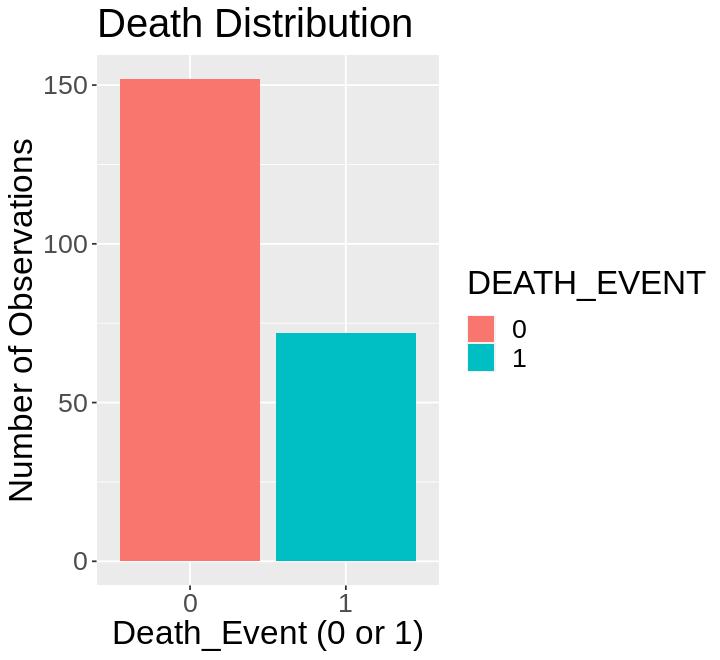

In [12]:
options(repr.plot.width = 6, repr.plot.height = 5.5)

heart_plot <- ggplot(observations_count, aes(x = DEATH_EVENT, y = count, fill = DEATH_EVENT)) +
  geom_bar(stat = "identity") +
  labs(x = "Death_Event (0 or 1)", y = "Number of Observations") +
  ggtitle("Death Distribution") +
  theme(text = element_text(size = 20))

heart_plot
print("Figure 3.4: Visualization of the Distribution of Each Category")

One problem that could arise when making a prediction model on our data set is class imbalance, where some classes have fewer instances than others. To address this in our final project, we plan to incorporate an oversampling step using the `step_upsample` function from the `themis` R package. This will solve the problem of the underrepresented class not having enough data in the K-nearest neighbor algorithm.

In [13]:
age_graph <- ggplot(heart_train, aes(x = age, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Age") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))
creatinine_phosphokinase_graph <- ggplot(heart_train, aes(x = creatinine_phosphokinase, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Creatinine Phosphokinase") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))
ejection_fraction_graph <- ggplot(heart_train, aes(x = ejection_fraction, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Ejection Fraction") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))
serum_creatinine_graph <- ggplot(heart_train, aes(x = serum_creatinine, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Serum Creatinine") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))
platelets_graph <- ggplot(heart_train, aes(x = platelets, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Platelets") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))
serum_sodium_graph <- ggplot(heart_train, aes(x = serum_sodium, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Serum Sodium") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))
time_graph <- ggplot(heart_train, aes(x = time, y = DEATH_EVENT, fill = DEATH_EVENT)) +
    geom_boxplot(alpha = 0.4) +
    xlab("Time") +
    ylab("Death Event") +
    theme(text = element_text(size = 14))

[1] "Figure 3.5: Distributions of Predictor Variables grouped by Categories"


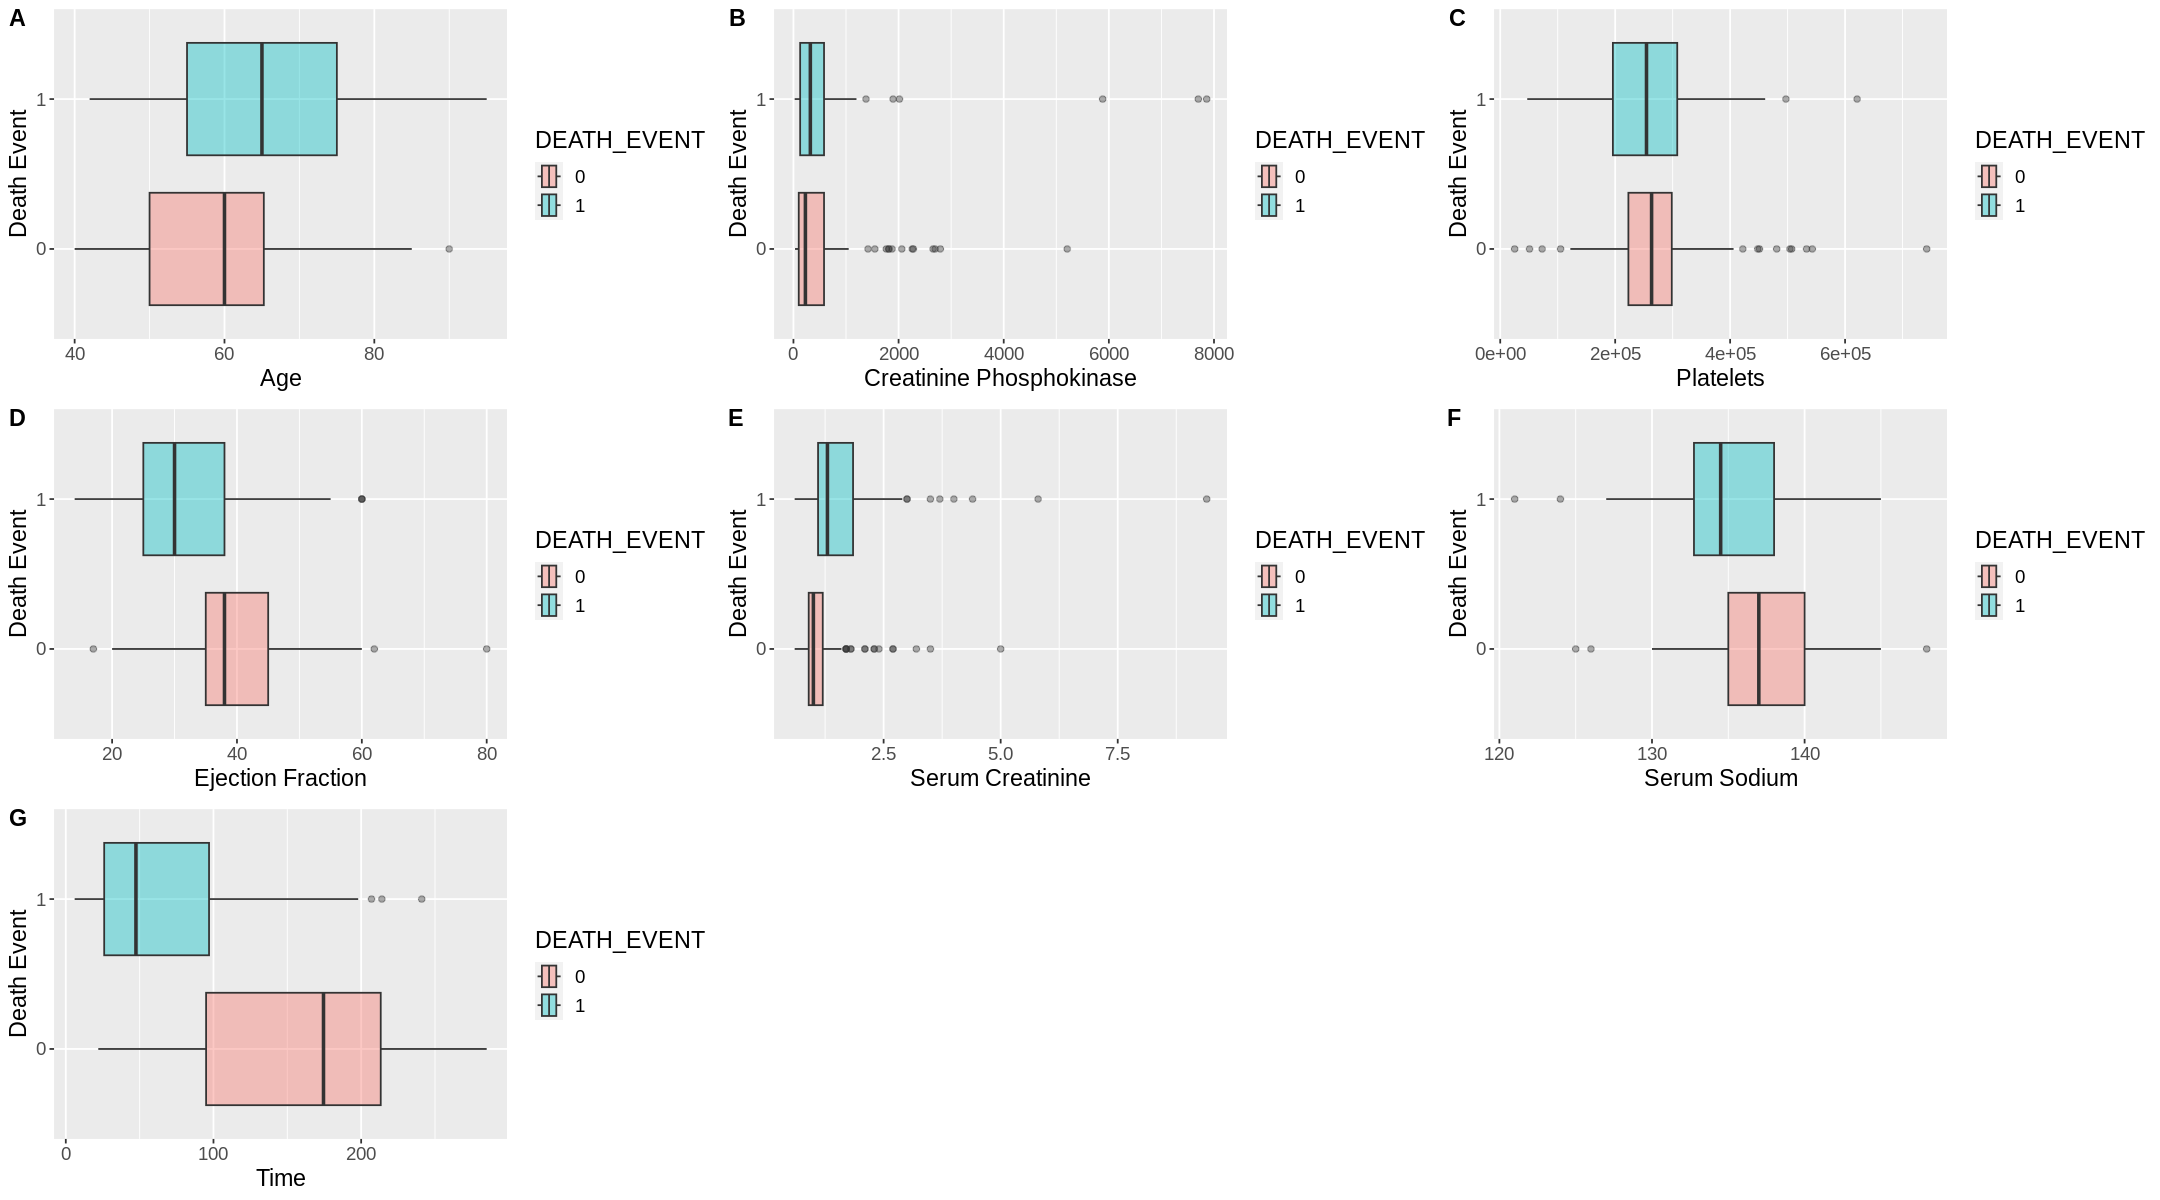

In [14]:
options(repr.plot.width = 18, repr.plot.height = 10)

plot_grid(age_graph,
          creatinine_phosphokinase_graph,
          platelets_graph,
          ejection_fraction_graph, 
          serum_creatinine_graph,
          serum_sodium_graph,
          time_graph,
          labels = c("A", "B", "C", "D", "E", "F", "G"),
          ncol = 3)
print("Figure 3.5: Distributions of Predictor Variables grouped by Categories")

- We can visualize the range and median of values for each predictor variable separated by `DEATH_EVENT` using `ggplot()` and `geom_boxplot()`.
- By looking at the boxplots for our training/testing split, we can see that the variables `age`, `ejectioin_fraction`, `serum_sodium`, and `time` vary in range and median for each category of `DEATH_EVENT`. This means that they may have a significant impact on predicting whether patients die or not.
- From the plots of `creatinine_phosphokinase`, `platelets`, and `serum_creatinine`, we can see that they do not vary much in range, median or both.

In [15]:
apply(heart_train, 2, sd)

age creatinine_phosphokinase        ejection_fraction 
            1.227725e+01             9.809120e+02             1.163147e+01 
               platelets         serum_creatinine             serum_sodium 
            9.580172e+04             9.074423e-01             4.012869e+00 
                    time              DEATH_EVENT 
            7.746873e+01             4.680709e-01

- We can `apply()` the `sd` function to all columns in `heart_train` to find the standard deviation of each predictor variable. 
- By looking at the standard deviation of each predictor variable, we can see that `serum_creatinine`, `serum_sodium`, and `DEATH_EVENT` have data clustered around the mean more than the other predictor variables.

## 4. Analyze predictor variables and select the ones of significance

- To find out how many variables are needed for the highest accuracy, we will create distinct recipes for each set of variables. Then we will compare the accuracy of the models. 
- This can be done by tuning for the first 20 k values performing 5 fold cross validation.
- The data must be scaled and centered to ensure that every single variable doesn't have too large or too little of an effect on the prediction model.

In [16]:
heart_vfold <- vfold_cv(heart_train, v = 5, strata = DEATH_EVENT)

gridvals <- tibble(neighbors = seq(1, 20))

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

In [17]:
a_recipe <- recipe(DEATH_EVENT ~ age, heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

a_results <- workflow() |>
    add_recipe(a_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

a_results_best <- a_results |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(mean)

In [18]:
ae_recipe <- recipe(DEATH_EVENT ~ age + ejection_fraction, heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

ae_results <- workflow() |>
    add_recipe(ae_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

ae_results_best <- ae_results |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(mean)

In [19]:
aes_recipe <- recipe(DEATH_EVENT ~ age + ejection_fraction + serum_sodium, heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

aes_results <- workflow() |>
    add_recipe(aes_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

aes_results_best <- aes_results |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(mean)

In [20]:
aest_recipe <- recipe(DEATH_EVENT ~ age + ejection_fraction + serum_sodium + time, heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

aest_results <- workflow() |>
    add_recipe(aest_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

aest_results_best <- aest_results |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(mean)

In [21]:
model <- c("age", 
           "age + ejection_fraction", 
           "age + ejection_fraction + serum_sodium", 
           "age + ejection_fraction + serum_sodium + time")

accuracy <- c(a_results_best, ae_results_best, aes_results_best, aest_results_best)

accuracy_table <- tibble(`Predictor Variables` = model, `Accuracy` = accuracy)

accuracy_table
print("Table 4.1: Accuracies of Models with Different Predictor Variables")

Predictor Variables,Accuracy
<chr>,<dbl>
age,0.7094862
age + ejection_fraction,0.7638340
age + ejection_fraction + serum_sodium,0.7369565
age + ejection_fraction + serum_sodium + time,0.8355731


[1] "Table 4.1: Accuracies of Models with Different Predictor Variables"


- Looking at Table 4.1, we can see that using all four variables yields the highest prediction accuracy.
- Hence, we will use all four variables to build our prediction variables.

## 5. Finding the Optimal `K` Value and Building the Final Model

- Using a large range of `K` values will increase the processing time. As Lall and Sharma note, the optimal `K` value is approximately equal to the square root of the number of observations.
- Hence, our `K` value is approximately equal to $\sqrt{224}$.
- Therefore, we will test for the first 20 `K` values. 

In [22]:
k_vals <- tibble(neighbors = 1:20)


heart_results <- workflow() |>
    add_recipe(aest_recipe) |> # aest_recipe is previously defined
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = k_vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")
heart_results |>
    arrange(desc(mean))

print("Table 5.1: Accuracies for Different K Values")

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,accuracy,binary,0.8355731,5,0.01752553,Preprocessor1_Model07
8,accuracy,binary,0.8355731,5,0.01752553,Preprocessor1_Model08
3,accuracy,binary,0.8302372,5,0.01144881,Preprocessor1_Model03
4,accuracy,binary,0.8302372,5,0.01144881,Preprocessor1_Model04
9,accuracy,binary,0.8084980,5,0.01956522,Preprocessor1_Model09
10,accuracy,binary,0.8084980,5,0.01956522,Preprocessor1_Model10
13,accuracy,binary,0.8041502,5,0.01753333,Preprocessor1_Model13
14,accuracy,binary,0.8041502,5,0.01753333,Preprocessor1_Model14
5,accuracy,binary,0.8037549,5,0.01998541,Preprocessor1_Model05


[1] "Table 5.1: Accuracies for Different K Values"


Plot the data from the table above to find the optimal `K` value.

[1] "Figure 5.2: Visualization of Accuracies Using Different K Value"


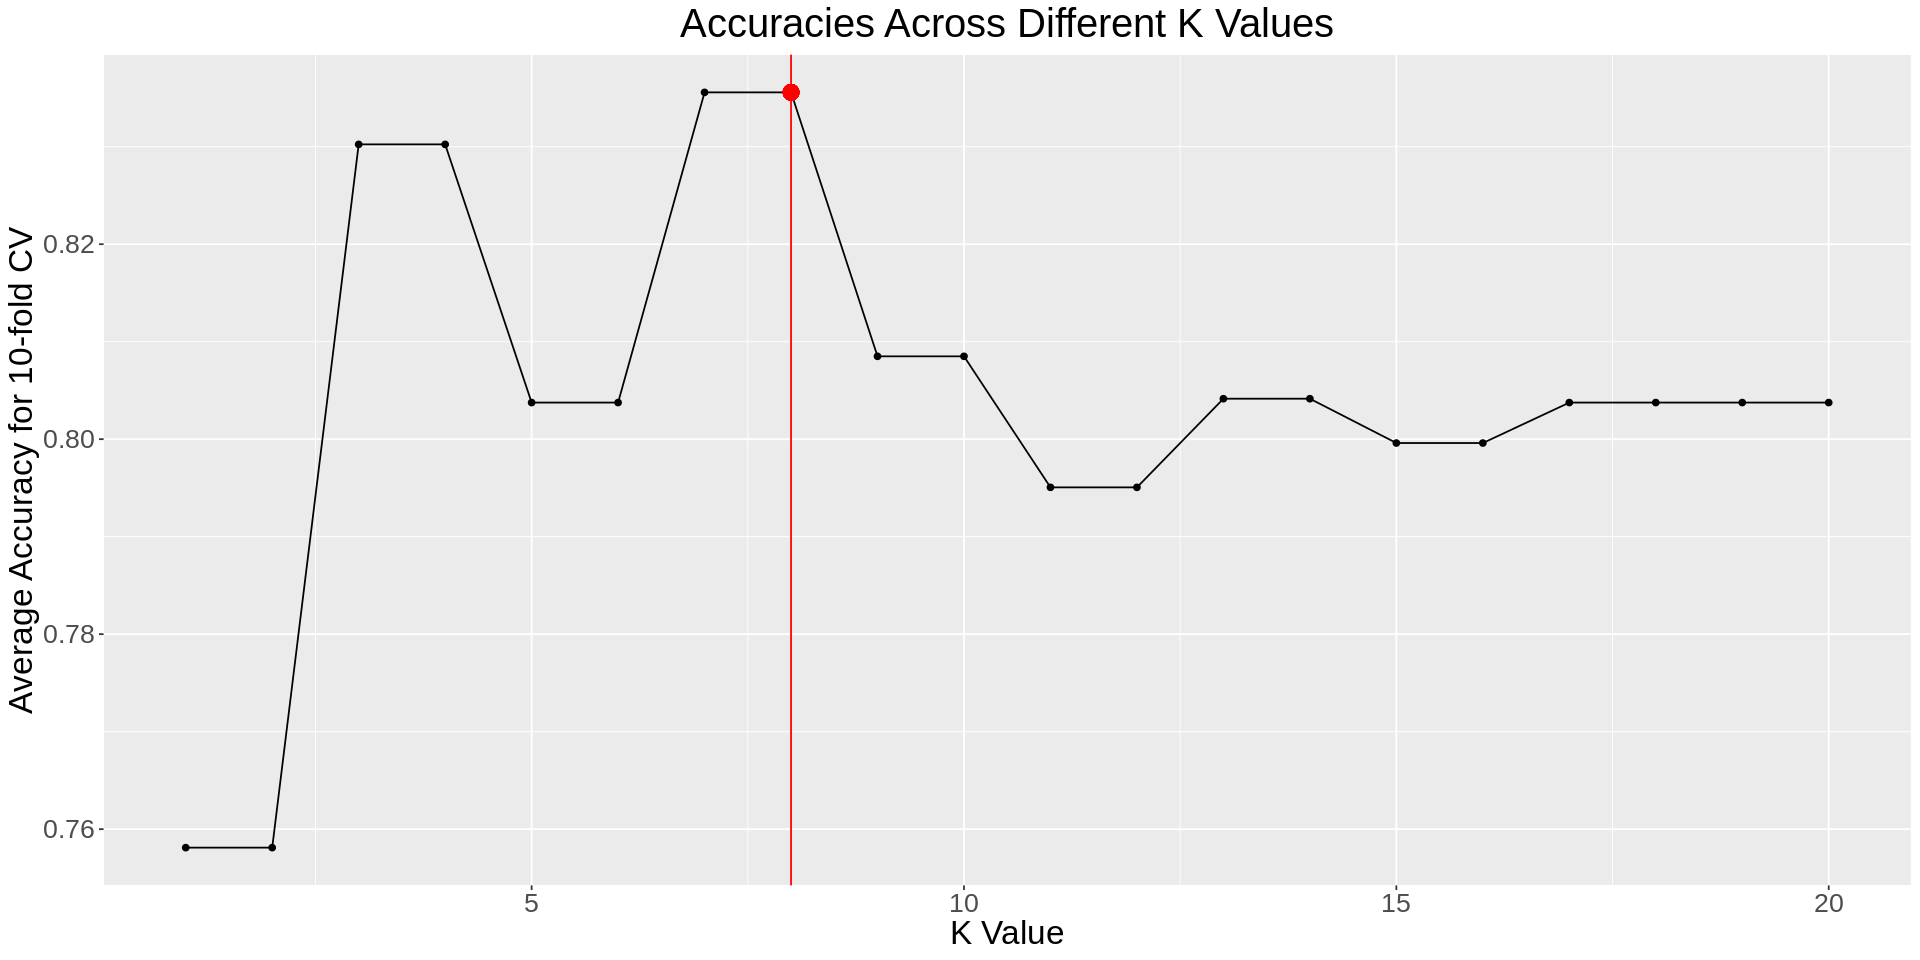

In [23]:
options(repr.plot.width = 16, repr.plot.height = 8)


k_accuracies_plot <- heart_results |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = 8, colour = "red") +
    geom_point(aes(x = 8, y = 0.8355731), size = 4, colour = "red") +
    labs(x = "K Value", y = "Average Accuracy for 10-fold CV") +
    ggtitle("Accuracies Across Different K Values") +
    theme(text = element_text(size = 20)) +
    theme(plot.title = element_text(hjust = 0.5))

k_accuracies_plot

print("Figure 5.2: Visualization of Accuracies Using Different K Value")

### Building the Final Classification Model

- To build a model to predict the target variable `DEATH_EVENT`, we can use the K-Nearest Neighbors algorithm. Previously, we determined that our optimal `K` value is 8, so now we set `neighbors` equal to 8. Then we choose the `kknn` algorithm with `set_engine` and set the `classification` mode using `set_mode`.
- We use `workflow()` to process the data and then fit the classification model on our training data `heart_train`.
- The output shows the number of processing steps, minimal misclassification rate, kernel used, and other information about the model.

In [24]:
best_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 8) |>
  set_engine("kknn") |>
  set_mode("classification")

# aest_recipe is previously defined
heart_fit <- workflow() |>
    add_recipe(aest_recipe) |>
    add_model(best_knn_spec) |>
    fit(data = heart_train)

print("Figure 5.2: Final Classification Model")
heart_fit

[1] "Figure 5.2: Final Classification Model"


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(8,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1919643
Best kernel: rectangular
Best k: 8

### Results

- We use the `predict()` function to evaluate the performance of our fitted model `heart_fit` by making predictions on the testing data `heart_test`. Next, we use `bind_cols()` to add new predictions to the testing data.
- Then we use the `metrics()` function to calculate the accuracy of our model's predictions on the testing data, by setting `truth` to the `DEATH_EVENT` column and `estimate` to our model's predictions of the target variable `DEATH_EVENT` based on the predictor variables. Lastly, the accuracy metric is selected using `select()` and extracted using `head(1)`.

In [25]:
heart_predictions <- predict(heart_fit, heart_test) |>
    bind_cols(heart_test)
heart_acc <- heart_predictions |>
    metrics(truth = DEATH_EVENT, estimate = .pred_class) |>
    select(.metric, .estimate) |>
    head(1)

print("Table 5.3: Model Accuracy on the Testing Set")
heart_acc

[1] "Table 5.3: Model Accuracy on the Testing Set"


.metric,.estimate
<chr>,<dbl>
accuracy,0.7866667


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


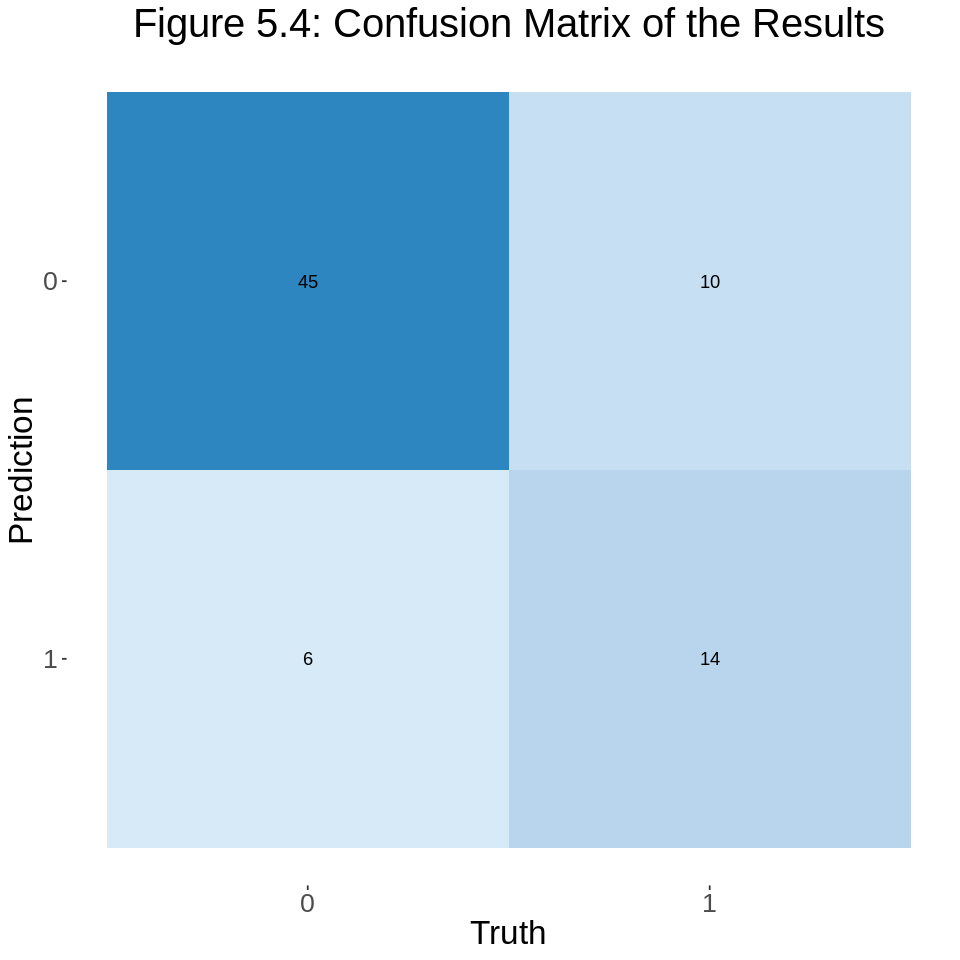

In [26]:
options(repr.plot.width = 8, repr.plot.height = 8)

heart_matrix <- heart_predictions |>
    conf_mat(truth = DEATH_EVENT, estimate = .pred_class) |>
     autoplot(type = "heatmap") +
    scale_fill_gradient(low="#D6EAF8",high = "#2E86C1") +
    labs(title = "Figure 5.4: Confusion Matrix of the Results") +
    theme(text = element_text(size = 20)) +
    theme(plot.title = element_text(hjust = 0.5))

heart_matrix

Looking at Figure 5.4, we can observe an accuracy of 78 percent from our model when running it on the testing set. Then we can see from the Confusion Matrix that most of the correct predictions are for when the patient is alive. 

[1] "Figure 5.6: Relation Between Different Predictor Variables"


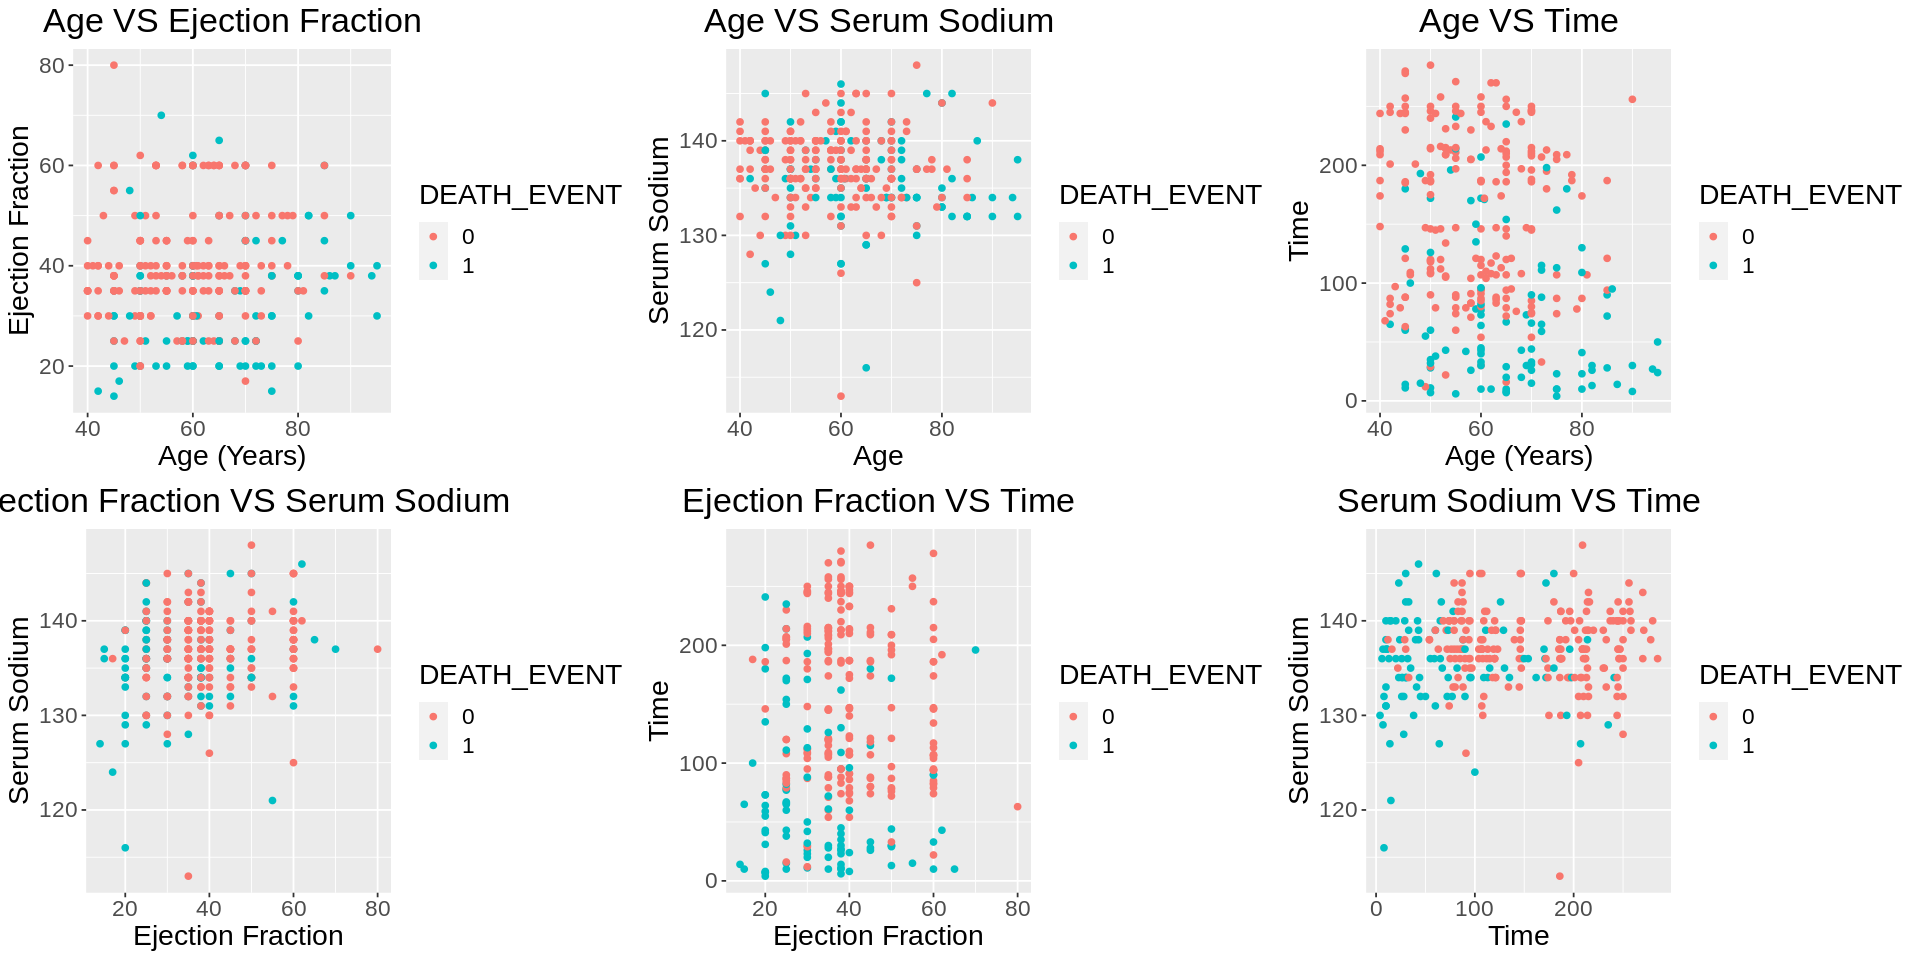

In [29]:
options(repr.plot.width = 16, repr.plot.height = 8)
age_vs_ef <- heart_data |>
    ggplot(aes(x = age, y = ejection_fraction, color = DEATH_EVENT)) +
    geom_point() +
    labs(title = "Age VS Ejection Fraction", x = "Age (Years)", y = "Ejection Fraction") +
    theme(text = element_text(size = 17)) +
    theme(plot.title = element_text(hjust = 0.5))

age_vs_ss <- heart_data |>
    ggplot(aes(x = age, y = serum_sodium, color = DEATH_EVENT)) +
    geom_point() +
    labs(title = "Age VS Serum Sodium", x = "Age", y = "Serum Sodium") +
    theme(text = element_text(size = 17)) +
    theme(plot.title = element_text(hjust = 0.5))

age_vs_time <- heart_data |>
    ggplot(aes(x = age, y = time, color = DEATH_EVENT)) +
    geom_point() +
    labs(title = "Age VS Time", x = "Age (Years)", y = "Time") +
    theme(text = element_text(size = 17)) +
    theme(plot.title = element_text(hjust = 0.5))

ef_vs_ss <- heart_data |>
    ggplot(aes(x = ejection_fraction, y = serum_sodium, color = DEATH_EVENT)) +
    geom_point() +
    labs(title = "Ejection Fraction VS Serum Sodium", x = "Ejection Fraction", y = "Serum Sodium") +
    theme(text = element_text(size = 17)) +
    theme(plot.title = element_text(hjust = 0.5))

ef_vs_time <- heart_data |>
    ggplot(aes(x = ejection_fraction, y = time, color = DEATH_EVENT)) +
    geom_point() +
    labs(title = "Ejection Fraction VS Time", x = "Ejection Fraction", y = "Time") +
    theme(text = element_text(size = 17)) +
    theme(plot.title = element_text(hjust = 0.5))

ss_vs_time <- heart_data |>
    ggplot(aes(x = time, y = serum_sodium, color = DEATH_EVENT)) +
    geom_point() +
    labs(title = "Serum Sodium VS Time", x = "Time", y = "Serum Sodium") +
    theme(text = element_text(size = 17)) +
    theme(plot.title = element_text(hjust = 0.5))

predictor_relation_plot <- plot_grid(age_vs_ef, age_vs_ss, age_vs_time, ef_vs_ss, ef_vs_time, ss_vs_time, ncol = 3)

predictor_relation_plot
print("Figure 5.6: Relation Between Different Predictor Variables")

From observing the graphs above, we can see that there is significant overlap between both categories of `DEATH_EVENT`. This could cause lower accuracy in our model.

## Discussion

In the project, we have built a model that predicts whether a patient suffering from heart failure will die. Our analysis through visualization using boxplots has shown that four variables have a significant effect on the variable we want to predict. These are, namely, `age`, `ejection_fraction`, `serum_sodium` and `time`. Further analysis has shown that the model using all four of these variables yields the highest accuracy.

#### Analysis of Accuracy 

On the testing set, our model has an accuracy of 78%. This is to be expected, since our training set does not have many rows. In addition, as can be seen from Figure 1, there is a big difference in the number of patients that live and die in our dataset. From Table 3.3, we can see that 68% of all patients live, while 32% die. As a result of the smaller number of patients that die, there is a greater chance that a prediction on an observation where the patient dies would say that he would live, as compared to if the number of observations for each category were equal. This is not preferable because, if a patient was diagnosed a false negative (predicted to live but dies) then there won't be appropiate medical care administered to the patient. It would be better if our model instead gave false postives (when patient is predicted to die but lives) since further tests can be performed to ensure the safety of the patient. This can be seen from our confusion matrix, where 19 rows are wrongly predicted as alive. Further, we had to eliminate many variable at the beginning that could have a notable impact on predicting whether a patient will die, such as `high_blood_pressure`. This is because these variables are categorical and hence we cannot use them as predictor variables. Further, as we can see from the Table 3.1, the mean values for most of the predictor variables do not have a significant difference. Hence, it is likely that our model will make an incorrect prediction, resulting in low accuracy.

Additionally, whether a patient is dead or alive may depend on more factors than the predictor variables. For example, if a patient and the patient's relatives have poor medical records, the patient may be more vulnerable to death than others.


#### Real Life Implications

Since the accuracy of our predictive model is not high enough, it has a limited scope to be used in the medical field. At best, it can be used as a preliminary tool to assess whether a patient is at risk of dying, particularly in the ICU. This is because the knn model has a low calculation time and time is of the utmost importance. However, as we have noted above, the higher likelihood of a false negative prediction might delay necessary intervention, which would have serious damaging consequences.

#### Questions for Further Research
- Would including the categorical variables when building a prediction model give a higher accuracy, and if so, by how much?
- How does this model compare to existing models that predict heart failure?
- Could this model be used to identify groups of patients that are at a higher risk of dying, based on a paritcular factor?



### References

National Guideline Centre (UK). Chronic Heart Failure in Adults: Diagnosis and Management. London: National Institute for Health and Care Excellence (NICE); 2018 Sep. (NICE Guideline, No. 106.) 2, Introduction. Available from: https://www.ncbi.nlm.nih.gov/books/NBK536089/.


Lall, U., & Sharma, A. (1996). A nearest neighbor bootstrap for resampling hydrologic time series. Water Resources Research, 32(3), 679-693. https://doi.org/10.1029/95WR02966